In [1]:
# load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('/home/ankita/Desktop/working_file/dir_15_07_2020_ml/906_iso_res+sus_scrt_genome_kmer_matrix.csv.csv',sep=",",low_memory=False,dtype="int8")
X = dataset.iloc[:,1 :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.info()
dataset.shape
print(len(X))
print(len(y))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Columns: 1251908 entries, Unnamed: 0 to label
dtypes: int8(1251908)
memory usage: 1.1 GB
906
906


In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
print(len(X_train))
print(len(X_test))

724
182


In [7]:
# fit a ensemble.AdaBoostClassifier() model to the data
model = XGBClassifier(learning_rate = 0.01,
                      n_estimators=100,max_depth=3,gamma=1,
                      subsample=0.8,colsample_bytree=0.8,)
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)


In [8]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)


XGBClassifier: 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        94
           1       1.00      0.90      0.95        88

    accuracy                           0.95       182
   macro avg       0.96      0.95      0.95       182
weighted avg       0.95      0.95      0.95       182


[[94  0]
 [ 9 79]]


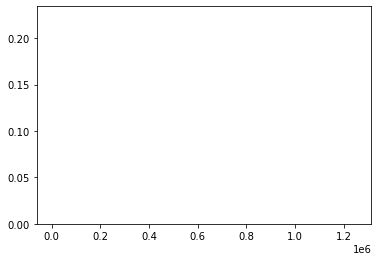

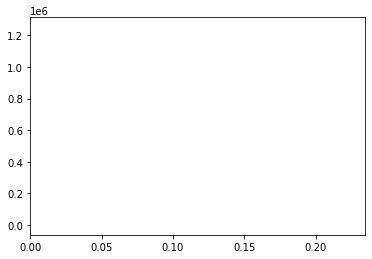

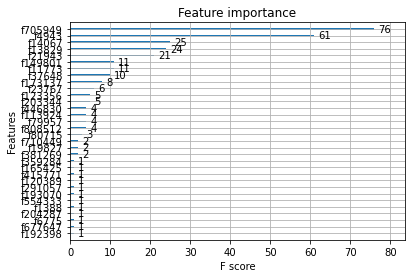

[0. 0. 0. ... 0. 0. 0.]


In [9]:
# summarize the fit of the model
print(); print('XGBClassifier: ')
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
plt.barh(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
plot_importance(model);     plt.show()
imp_fea=model.feature_importances_
print(imp_fea)

In [20]:
np.save('important_feature.npy',imp_fea)